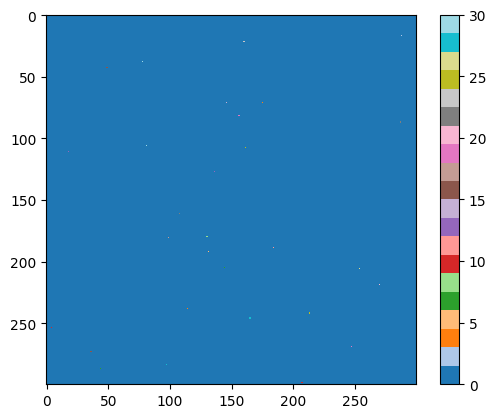

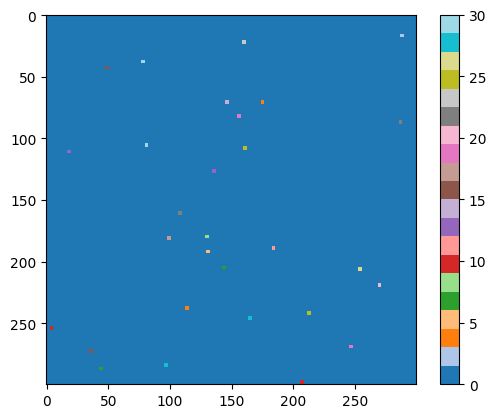

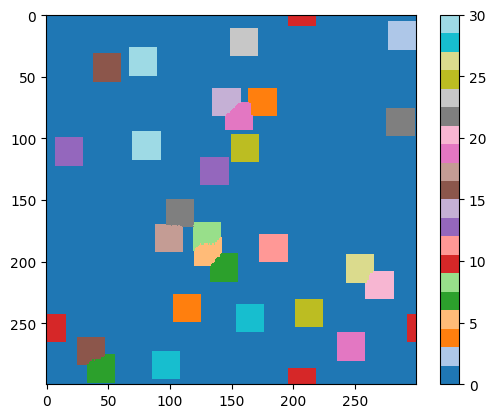

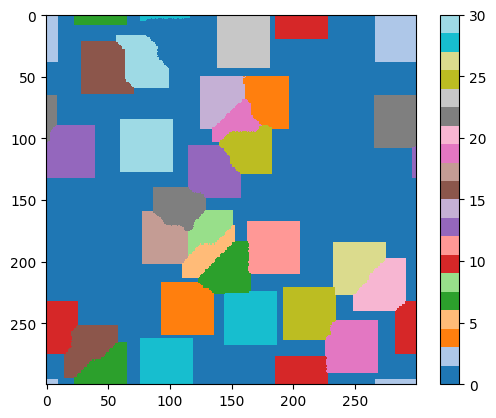

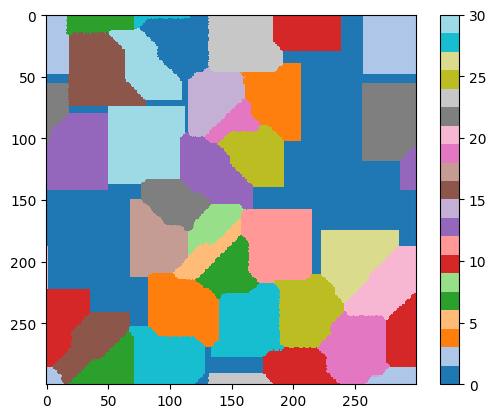

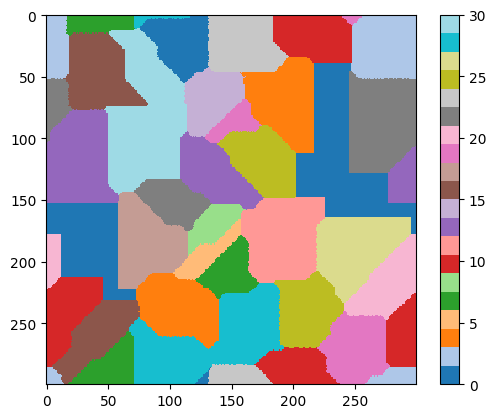

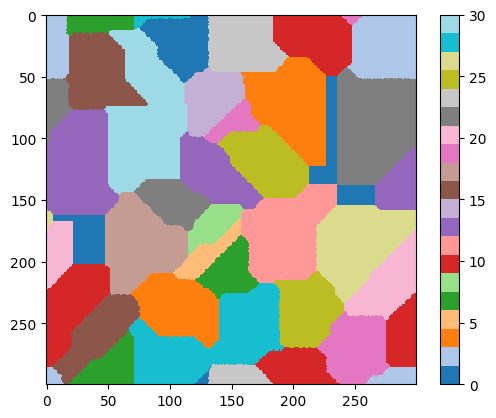

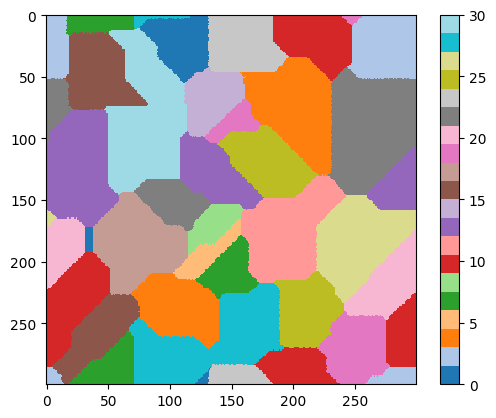

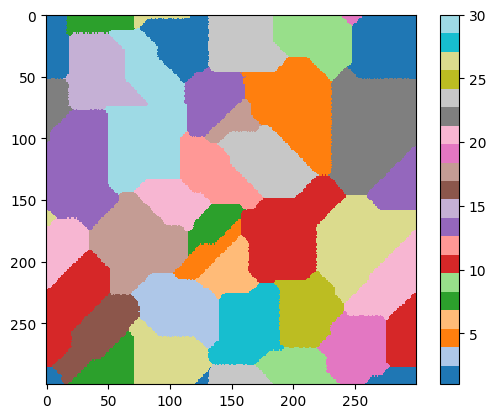

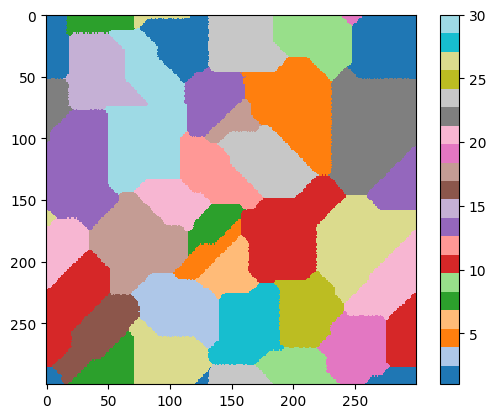

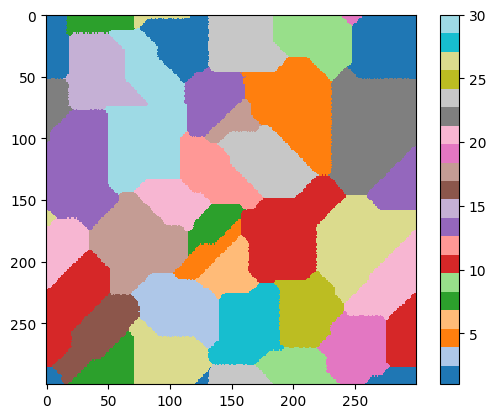

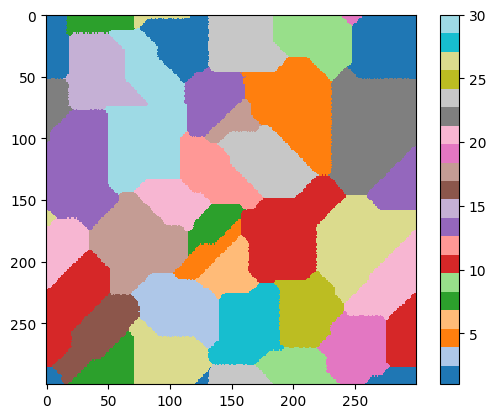

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import random

def initialize_grid(size, num_grains):
    grid = np.zeros((size, size), dtype=int)
    for _ in range(num_grains):
        x, y = random.randint(0, size-1), random.randint(0, size-1)
        grid[x, y] = _ + 1  # Assign unique grain ID
    return grid

def get_neighbors(grid, x, y):
    neighbors = []
    size = len(grid)
    for dx in [-1, 0, 1]:
        for dy in [-1, 0, 1]:
            if dx == 0 and dy == 0:
                continue
            nx, ny = (x + dx) % size, (y + dy) % size  # Wrap around for periodic boundary conditions
            neighbors.append(grid[nx, ny])
    return neighbors

def update_grid(grid):
    new_grid = grid.copy()
    size = len(grid)
    for x in range(size):
        for y in range(size):
            if grid[x, y] == 0:  # If cell is empty
                neighbors = get_neighbors(grid, x, y)
                non_zero_neighbors = [n for n in neighbors if n != 0]
                if non_zero_neighbors:
                    new_grid[x, y] = random.choice(non_zero_neighbors)
    return new_grid

def simulate_grain_growth(size, num_grains, steps):
    grid = initialize_grid(size, num_grains)
    plot_grid(grid)
    for step in range(steps):
        grid = update_grid(grid)
        if step % 10 == 0:
            plot_grid(grid)
    return grid

def plot_grid(grid):
    plt.imshow(grid, cmap='tab20', interpolation='nearest')
    plt.colorbar()
    plt.show()

size = 300  # Size of the grid
num_grains = 30  # Initial number of grains
steps = 100  # Number of simulation steps

grid = simulate_grain_growth(size, num_grains, steps)
plot_grid(grid)


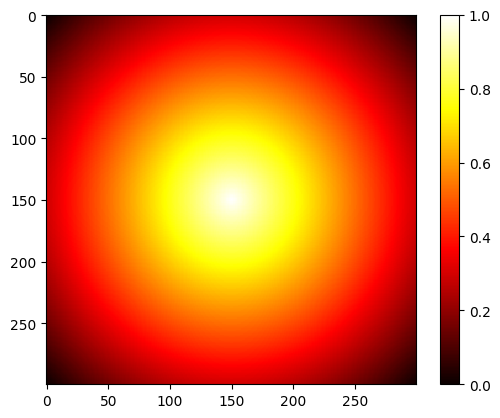

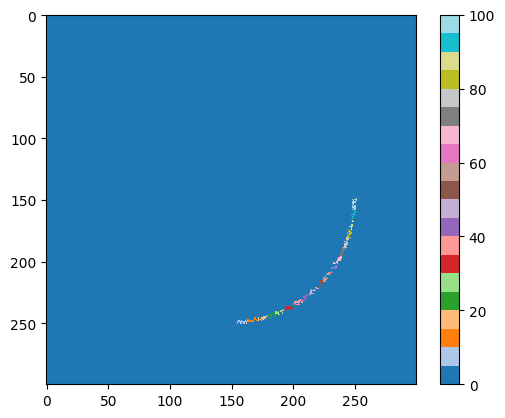

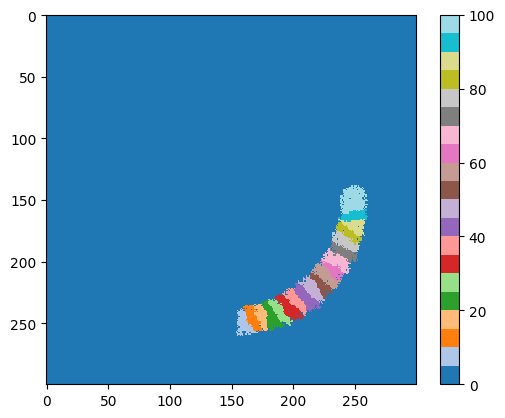

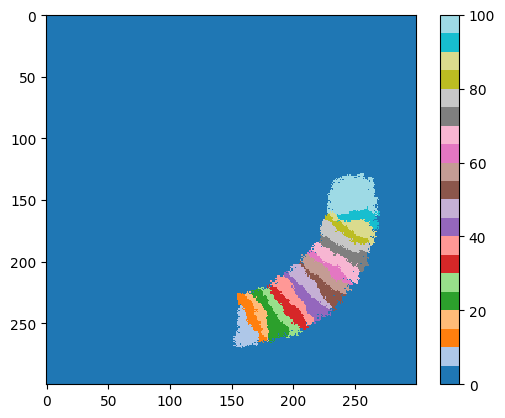

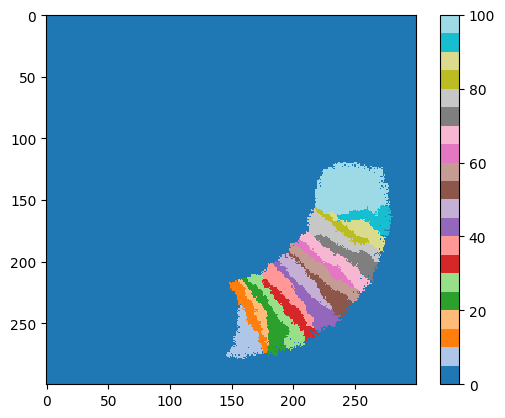

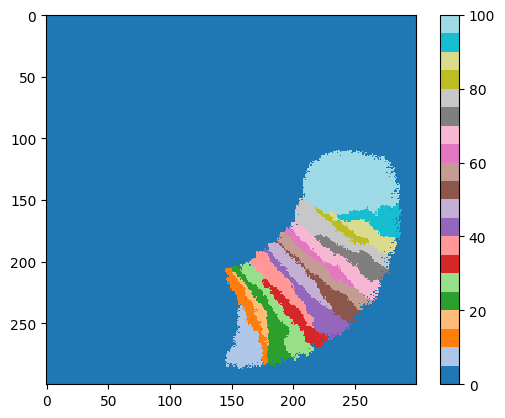

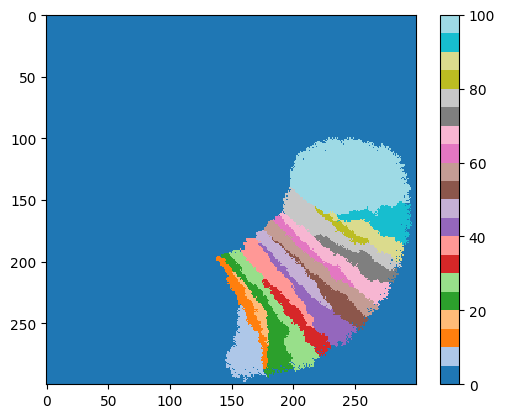

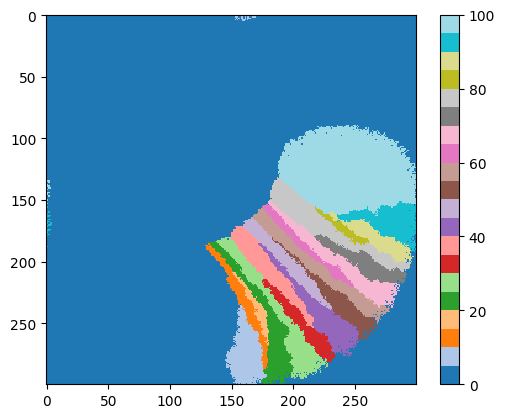

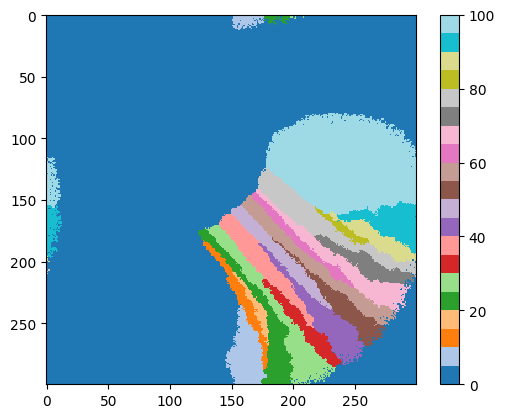

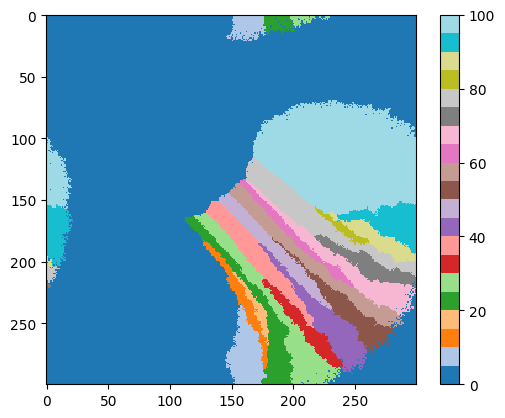

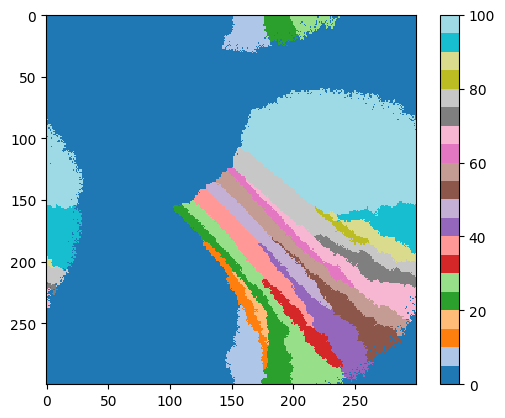

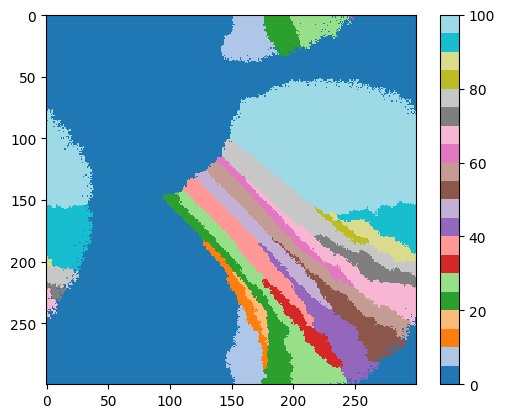

In [28]:
def create_temperature_crater(size, center, max_temp):
    x, y = np.indices((size, size))
    distance = np.sqrt((x - center[0])**2 + (y - center[1])**2)
    max_distance = np.sqrt(center[0]**2 + center[1]**2)
    temperature = max_temp * (1 - (distance / max_distance))
    return temperature

def initialize_grid(size, num_grains, arc_radius, arc_start_angle, arc_end_angle, center):
    grid = np.zeros((size, size), dtype=int)
    angles = np.linspace(arc_start_angle, arc_end_angle, num_grains)
    
    for grain_id, angle in enumerate(angles, start=1):
        x = int(center[0] + arc_radius * np.cos(angle))
        y = int(center[1] + arc_radius * np.sin(angle))
        if 0 <= x < size and 0 <= y < size:
            grid[x, y] = grain_id
    
    return grid

def get_neighbors(grid, x, y):
    neighbors = []
    size = len(grid)
    for dx in [-1, 0, 1]:
        for dy in [-1, 0, 1]:
            if dx == 0 and dy == 0:
                continue
            nx, ny = (x + dx) % size, (y + dy) % size  # Wrap around for periodic boundary conditions
            neighbors.append(grid[nx, ny])
    return neighbors

def update_grid(grid, temperature):
    new_grid = grid.copy()
    size = len(grid)
    for x in range(size):
        for y in range(size):
            if grid[x, y] == 0:  # If cell is empty
                neighbors = get_neighbors(grid, x, y)
                non_zero_neighbors = [n for n in neighbors if n != 0]
                if non_zero_neighbors:
                    # Temperature influences the probability of grain growth
                    if random.random() < temperature[x, y]:
                        new_grid[x, y] = random.choice(non_zero_neighbors)
    return new_grid

def simulate_grain_growth(size, num_grains, steps, temperature, arc_radius, arc_start_angle, arc_end_angle, center):
    grid = initialize_grid(size, num_grains, arc_radius, arc_start_angle, arc_end_angle, center)
    for step in range(steps):
        grid = update_grid(grid, temperature)
        if step % 10 == 0:
            plot_grid(grid)
    return grid

def plot_grid(grid):
    plt.imshow(grid, cmap='tab20', interpolation='nearest')
    plt.colorbar()
    plt.show()

def plot_temperature(temperature):
    plt.imshow(temperature, cmap='hot', interpolation='nearest')
    plt.colorbar()
    plt.show()

size = 300  # Size of the grid
num_grains = 100  # Initial number of grains
steps = 100  # Number of simulation steps
center = (size // 2, size // 2)  # Center of the crater
max_temp = 1.0  # Maximum temperature

arc_radius = 100  # Radius of the arc
arc_start_angle = 0  # Start angle of the arc (in radians)
arc_end_angle = np.pi / 2  # End angle of the arc (in radians)

temperature = create_temperature_crater(size, center, max_temp)
plot_temperature(temperature)  # Visualize the temperature gradient

grid = simulate_grain_growth(size, num_grains, steps, temperature, arc_radius, arc_start_angle, arc_end_angle, center)
plot_grid(grid)  # Visualize the grain growth

